In [4]:
import numpy as np
from IPython import display

def gen_audio(frequency, duration, sample_rate):
    t = np.linspace(0, duration, duration * sample_rate)
    return t, np.sin(2 * np.pi * frequency * t)

_, hz_2000 = gen_audio(2000, 3, 44100)
display.Audio(hz_2000, rate=44100)

In [5]:
_, hz_8000 = gen_audio(8000, 3, 44100)
display.Audio(hz_8000, rate=44100)

In [6]:
_, hz_16000 = gen_audio(16000, 3, 44100)
display.Audio(hz_16000, rate=44100)

In [7]:
# C
_, hz_261 = gen_audio(261.63, 1, 44100)
display.Audio(hz_261, rate=44100)

In [8]:
# E
_, hz_329 = gen_audio(329.63, 1, 44100)
display.Audio(hz_329, rate=44100)

In [18]:
# C + E
hz_261_329 = (hz_261 + hz_329) / 2
display.Audio(hz_261_329, rate=44100)

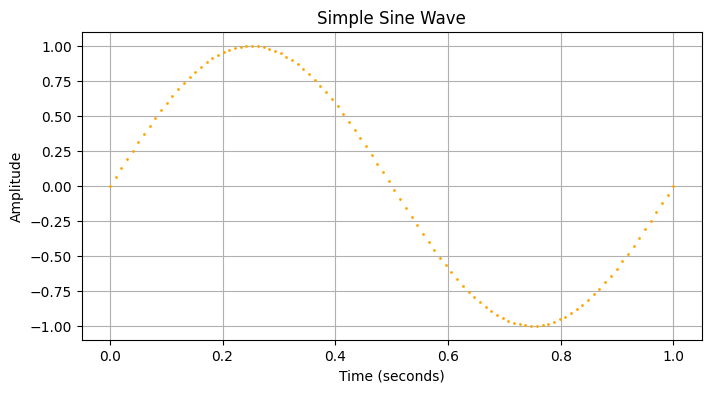

In [11]:
import matplotlib.pyplot as plt

t, waveform = gen_audio(1, 1, 100)

# Plot the waveform
plt.figure(figsize=(8, 4))
plt.plot(t, waveform, 'o', color='orange', markersize=1)
plt.title("Simple Sine Wave")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

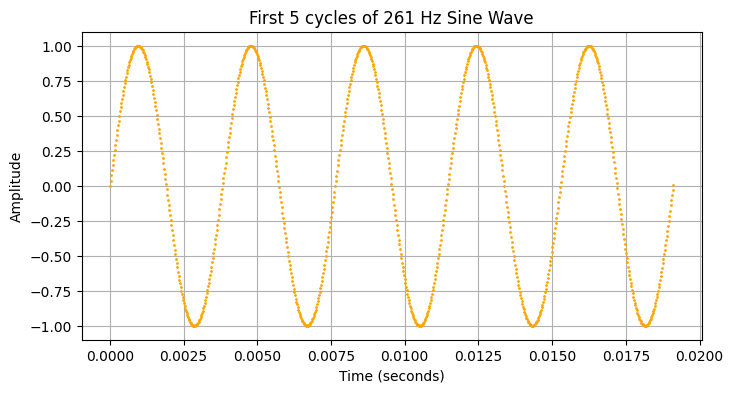

In [12]:
# C
t, hz_261 = gen_audio(261.63, 1, 44100)

# Plot first few cycles to see the waveform clearly
cycles_to_show = 5
duration_to_show = cycles_to_show / 261  # Time for 5 cycles
samples_to_show = int(duration_to_show * 44100)

# Plot the waveform
plt.figure(figsize=(8, 4))
plt.plot(t[:samples_to_show], hz_261[:samples_to_show], 'o', color='orange', markersize=1)
plt.title("First 5 cycles of 261 Hz Sine Wave")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()

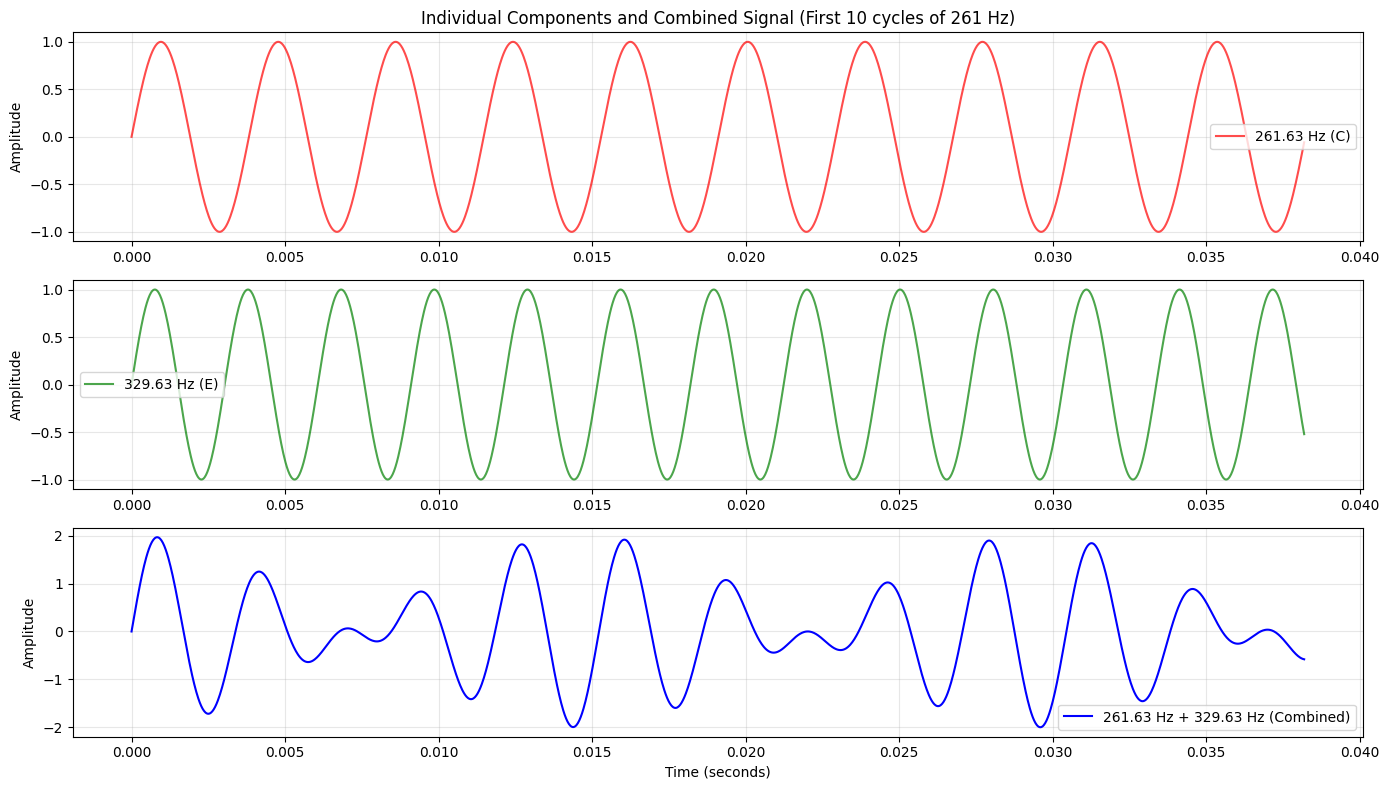

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Generate individual signals
t, hz_261 = gen_audio(261.63, 1, 44100)
_, hz_329 = gen_audio(329.63, 1, 44100)

# Combine the signals
hz_261_329 = hz_261 + hz_329

# Calculate duration to show (5 cycles of the lower frequency)
cycles_to_show = 10
duration_to_show = cycles_to_show / 261.63
samples_to_show = int(duration_to_show * 44100)

# Plot all three signals
plt.figure(figsize=(14, 8))

# Individual components
plt.subplot(3, 1, 1)
plt.plot(t[:samples_to_show], hz_261[:samples_to_show], 'r-', linewidth=1.5, alpha=0.7, label='261.63 Hz (C)')
plt.title(f'Individual Components and Combined Signal (First {cycles_to_show} cycles of 261 Hz)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(3, 1, 2)
plt.plot(t[:samples_to_show], hz_329[:samples_to_show], 'g-', linewidth=1.5, alpha=0.7, label='329.63 Hz (E)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

# Combined signal
plt.subplot(3, 1, 3)
plt.plot(t[:samples_to_show], hz_261_329[:samples_to_show], 'b-', linewidth=1.5, label='261.63 Hz + 329.63 Hz (Combined)')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


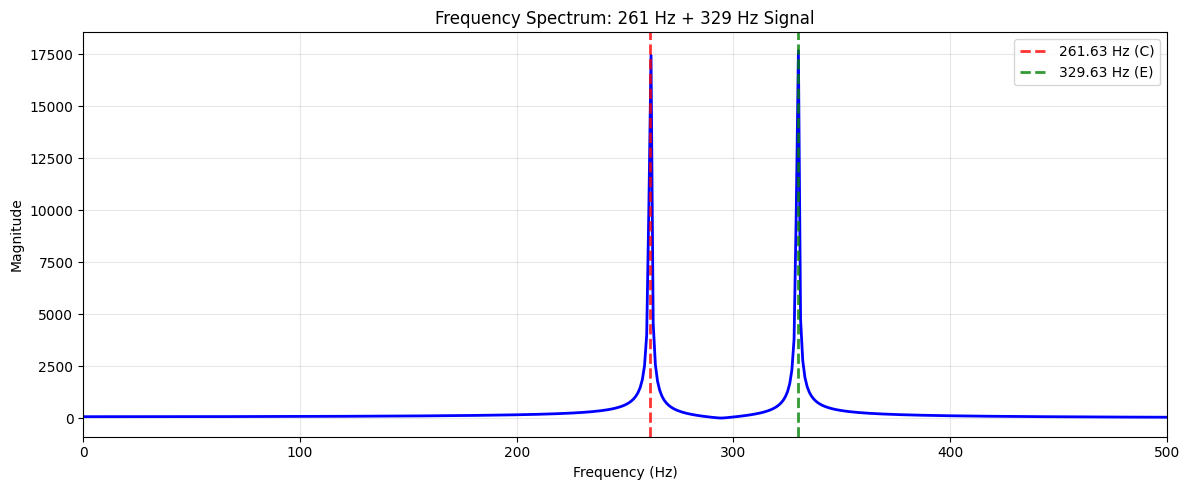

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure we have the combined signal
t, hz_261 = gen_audio(261.63, 1, 44100)
_, hz_329 = gen_audio(329.63, 1, 44100)
hz_261_329 = hz_261 + hz_329

# Compute FFT spectrum
spectrum = np.fft.rfft(hz_261_329)
magnitude = np.abs(spectrum)
freqs = np.fft.rfftfreq(len(hz_261_329), 1/44100)

# Plot
plt.figure(figsize=(12, 5))
plt.plot(freqs, magnitude, 'b-', linewidth=2)
plt.axvline(261.63, color='r', linestyle='--', linewidth=2, label='261.63 Hz (C)', alpha=0.8)
plt.axvline(329.63, color='g', linestyle='--', linewidth=2, label='329.63 Hz (E)', alpha=0.8)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Spectrum: 261 Hz + 329 Hz Signal')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(0, 500)
plt.tight_layout()
plt.show()